In [2]:
import pandas as pd

df = pd.read_csv('../dataset/student.csv')


In [3]:
import pandas as pd

# df[['name', 'mark']]
# df.head(3)
df[df['class'] == 'Four']

,id,name,class,mark,gender
0,1,John Deo,Four,75,female
3,4,Krish Star,Four,60,female
4,5,John Mike,Four,60,female
5,6,Alex John,Four,55,male
9,10,Big John,Four,55,female
15,16,Gimmy,Four,88,male
20,21,Babby John,Four,69,female
30,31,Marry Toeey,Four,88,male


In [4]:
df['passed'] = df['mark'] >= 60
df = df.rename(columns={'mark': 'score'})
df = df.drop(columns=['passed'])
print(df)

    id         name  class  score  gender
0    1     John Deo   Four     75  female
1    2     Max Ruin  Three     85    male
2    3       Arnold  Three     55    male
3    4   Krish Star   Four     60  female
4    5    John Mike   Four     60  female
5    6    Alex John   Four     55    male
6    7  My John Rob  Fifth     78    male
7    8       Asruid   Five     85    male
8    9      Tes Qry    Six     78     NaN
9   10     Big John   Four     55  female
10  11       Ronald    Six     89  female
11  12        Recky    Six     94  female
12  13          Kty  Seven     88  female
13  14         Bigy  Seven     88  female
14  15     Tade Row    NaN     88    male
15  16        Gimmy   Four     88    male
16  17        Tumyu    Six     54    male
17  18        Honny   Five     75    male
18  19        Tinny   Nine     18    male
19  20       Jackly   Nine     65  female
20  21   Babby John   Four     69  female
21  22       Reggid  Seven     55  female
22  23        Herod  Eight     79 

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



marks = df.groupby('class')['score'].mean().reset_index()

# print(marks)

counts = df['class'].value_counts()

# print(counts)

average_marks = df.groupby('gender')['score'].mean()

print(average_marks)



gender
female    77.312500
male      71.588235
Name: score, dtype: float64


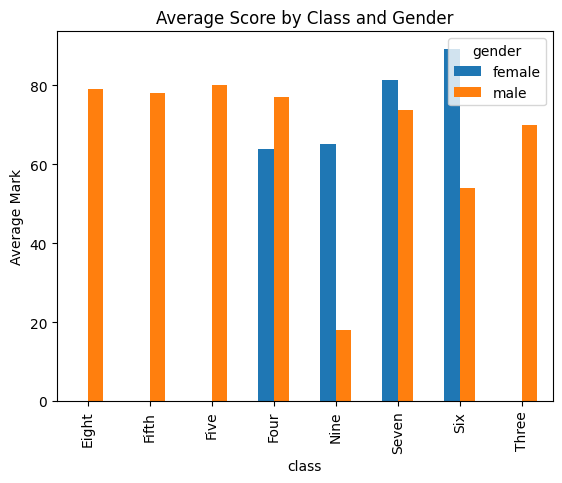

In [6]:
import pandas as pd
import matplotlib.pyplot as plt



pivot_df = df.pivot_table(index='class', columns='gender', values='score', aggfunc='mean')


pivot_df.plot(kind='bar')
plt.ylabel('Average Mark')
plt.title('Average Score by Class and Gender')
plt.show()


/var/folders/wn/yv_4s6ys35z6ldk5d54s1k6h0000gn/T/ipykernel_32283/998039853.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='grade', data=df, order=['A','B','C','D'], palette='tab10')


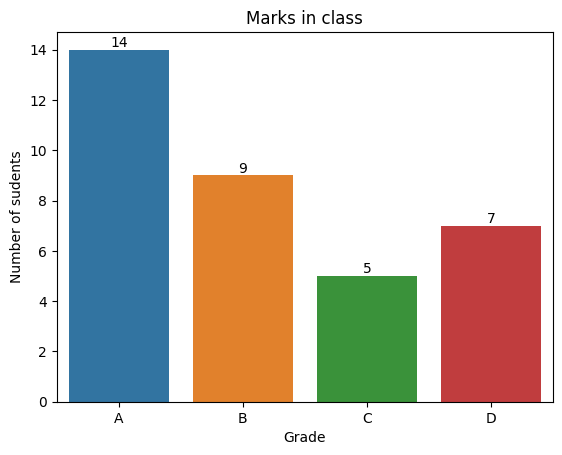

In [7]:
df['grade'] = pd.cut(
    df['score'],
    bins=[-1, 59, 69, 84, 100],
    labels=['D', 'C', 'B', 'A']
)
top10 = df.sort_values(by='score', ascending=False).head(10)
# print(top10[['name', 'score', 'grade']])

# df['grade']
ax = sns.countplot(x='grade', data=df, order=['A','B','C','D'], palette='tab10')
# ax.bar_label(ax.containers[0]) # it didn't work in my case, after some research i came to know that label setting only applies for the first bad, totally ignoring the rest

for container in ax.containers: ax.bar_label(container) #wrapping in a loop makes it proper, labels are applying to all bar charst 

plt.title("Marks in class")
plt.xlabel("Grade")
plt.ylabel("Number of sudents")
plt.show()

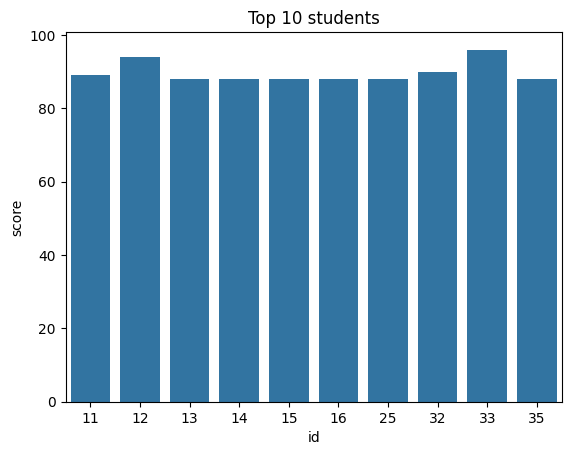

    id         name  class  score  gender grade
32  33    Kenn Rein    Six     96  female     A
11  12        Recky    Six     94  female     A
31  32    Binn Rott  Seven     90  female     A
10  11       Ronald    Six     89  female     A
24  25     Giff Tow  Seven     88    male     A
15  16        Gimmy   Four     88    male     A
14  15     Tade Row    NaN     88    male     A
13  14         Bigy  Seven     88  female     A
12  13          Kty  Seven     88  female     A
34  35   Rows Noump    Six     88  female     A
30  31  Marry Toeey   Four     88    male     A
27  28    Rojj Base  Seven     86  female     A
7    8       Asruid   Five     85    male     A
1    2     Max Ruin  Three     85    male     A
26  27          NaN  Three     81     NaN     B
22  23        Herod  Eight     79    male     B
29  30    Reppy Red    Six     79  female     B
25  26       Crelea  Seven     79    male     B
8    9      Tes Qry    Six     78     NaN     B
6    7  My John Rob  Fifth     78    mal

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

df = df.sort_values(by='score', ascending=False)

top10 = df.head(10) #top 10 (set the parameter)

sns.barplot(x='id', y='score', data=top10, estimator=sum)
plt.title("Top 10 students")
plt.show()
print(df)